# importing the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


In [2]:
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [3]:
df=pd.read_csv('covid_19_clean_complete.csv')

In [4]:
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [5]:
df.rename(columns={'Province/State':'state','Country/Region':'country'},inplace=True)

In [6]:
df.head()

state      country       Lat       Long        Date  Confirmed  Deaths  \
0   NaN  Afghanistan  33.93911  67.709953  2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300  2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600  2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800  2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900  2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [7]:
#analysis on the lastest date

In [8]:
df['Date'].max()

'2020-07-27'

In [9]:
latest_date=df[df['Date']=='2020-07-27']

In [10]:
latest_date.head()

state      country       Lat       Long        Date  Confirmed  Deaths  \
48807   NaN  Afghanistan  33.93911  67.709953  2020-07-27      36263    1269   
48808   NaN      Albania  41.15330  20.168300  2020-07-27       4880     144   
48809   NaN      Algeria  28.03390   1.659600  2020-07-27      27973    1163   
48810   NaN      Andorra  42.50630   1.521800  2020-07-27        907      52   
48811   NaN       Angola -11.20270  17.873900  2020-07-27        950      41   

       Recovered  Active             WHO Region  
48807      25198    9796  Eastern Mediterranean  
48808       2745    1991                 Europe  
48809      18837    7973                 Africa  
48810        803      52                 Europe  
48811        242     667                 Africa

In [11]:
latest_date.groupby(by="country")[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

country  Confirmed  Deaths  Recovered  Active
0           Afghanistan      36263    1269      25198    9796
1               Albania       4880     144       2745    1991
2               Algeria      27973    1163      18837    7973
3               Andorra        907      52        803      52
4                Angola        950      41        242     667
..                  ...        ...     ...        ...     ...
182  West Bank and Gaza      10621      78       3752    6791
183      Western Sahara         10       1          8       1
184               Yemen       1691     483        833     375
185              Zambia       4552     140       2815    1597
186            Zimbabwe       2704      36        542    2126

[187 rows x 5 columns]

In [12]:
confirmed=df.groupby(by="Date")[['Confirmed']].sum().reset_index()

In [13]:
confirmed

Date  Confirmed
0    2020-01-22        555
1    2020-01-23        654
2    2020-01-24        941
3    2020-01-25       1434
4    2020-01-26       2118
..          ...        ...
183  2020-07-23   15510481
184  2020-07-24   15791645
185  2020-07-25   16047190
186  2020-07-26   16251796
187  2020-07-27   16480485

[188 rows x 2 columns]

<Axes: xlabel='Date', ylabel='Confirmed'>

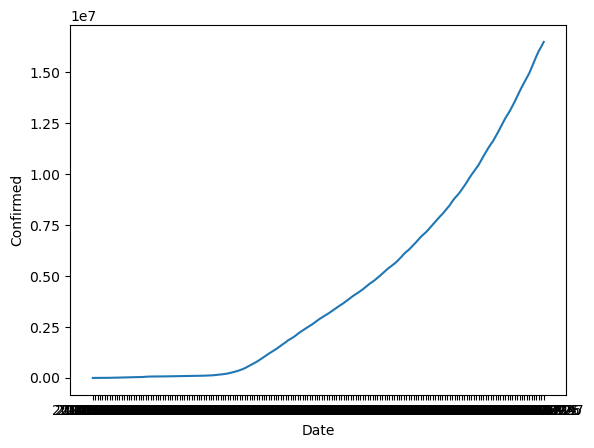

In [14]:
sns.lineplot(data=confirmed,x='Date',y='Confirmed')

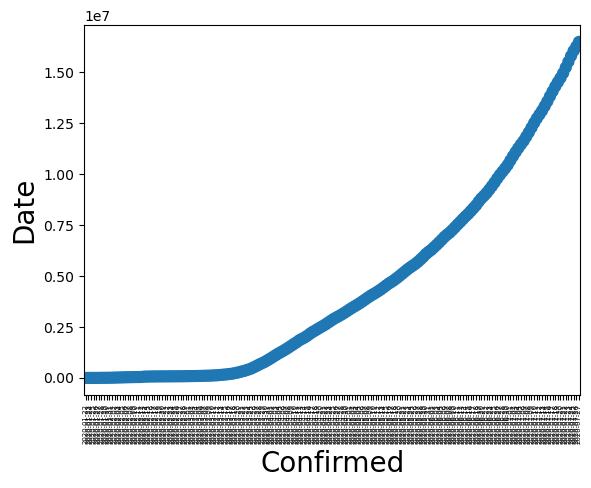

In [15]:
plt.figsize=((40,30))
sns.pointplot(data=confirmed,x='Date',y='Confirmed')
plt.xticks(rotation=90,fontsize=5)
plt.xlabel('Confirmed',fontsize=20)
plt.ylabel('Date',fontsize=20)
plt.show()

In [16]:
#countries with the most recovered cases 

In [17]:
df.columns

Index(['state', 'country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

# EDA

In [18]:
top_recovered=df.groupby(by='country')['Recovered'].sum().sort_values(ascending=False).head(10).reset_index()

Text(0.5, 1.0, 'Top 10 countries in recovered cases')

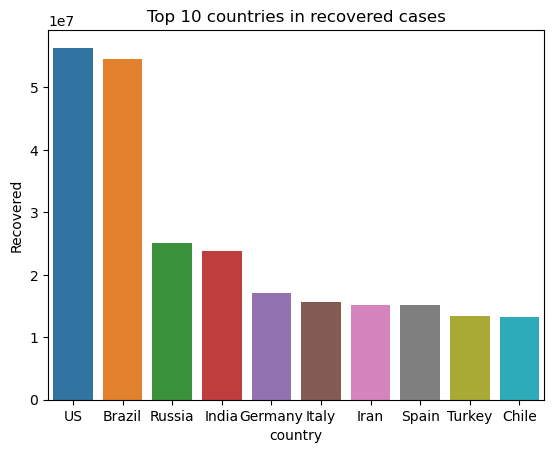

In [19]:
sns.barplot(data=top_recovered,x='country',y='Recovered')
plt.title('Top 10 countries in recovered cases')

In [20]:
top_deaths=df.groupby(by='country')['Deaths'].sum().sort_values(ascending=False).head(10).reset_index()

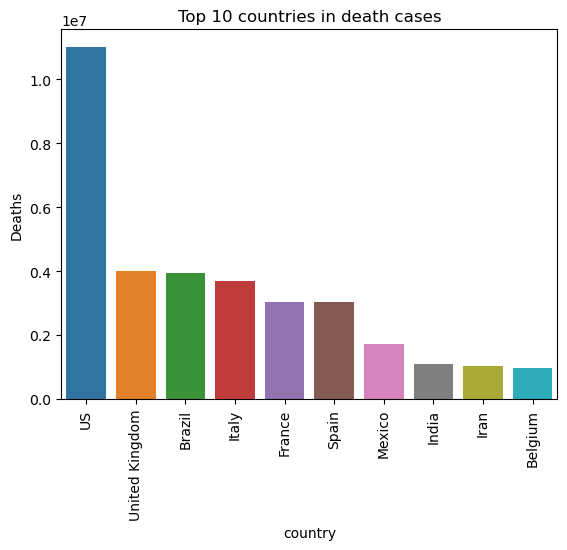

In [21]:
sns.barplot(data=top_deaths,x='country',y='Deaths')
plt.title('Top 10 countries in death cases')
plt.xticks(rotation=90)
plt.show()

In [22]:
top_active=df.groupby(by='country')['Active'].sum().sort_values(ascending=False).head(10).reset_index()

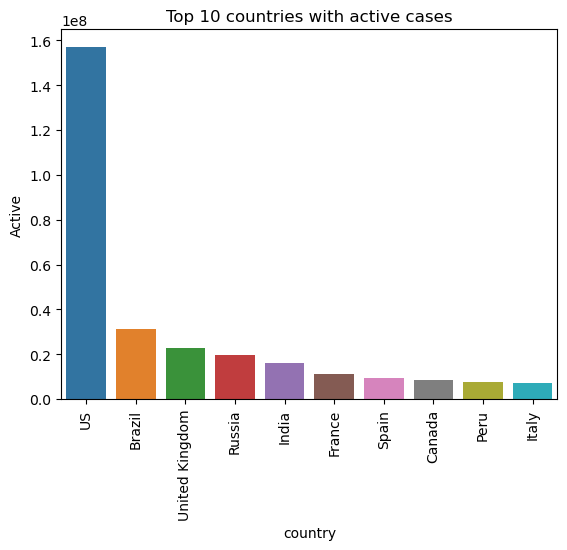

In [23]:
sns.barplot(data=top_active,x='country',y='Active')
plt.title('Top 10 countries with active cases')
plt.xticks(rotation=90)
plt.show()

In [24]:
import plotly
import plotly.express as px

In [25]:
world=df.groupby(by="country")[["Confirmed","Recovered","Active","Deaths"]].sum().reset_index()

In [26]:
world=df.groupby(by="country")[["Confirmed","Recovered","Active","Deaths"]].sum().reset_index()

figure=px.choropleth(world,locations="country",locationmode="country names",color="Active"
                    ,hover_name="country",range_color=[1,20000],
                    color_continuous_scale="reds", title="Countries with Active cases")
figure.show()

In [27]:
figure=px.choropleth(world,locations="country",locationmode="country names",color="Confirmed"
                    ,hover_name="country",range_color=[1,20000],
                    color_continuous_scale="reds", title="Countries with confirmed cases")
figure.show()

In [28]:
figure=px.choropleth(world,locations="country",locationmode="country names",color="Deaths"
                    ,hover_name="country",range_color=[1,20000],
                    color_continuous_scale="reds", title="Countries with total deaths")
figure.show()

In [29]:
figure=px.choropleth(world,locations="country",locationmode="country names",color="Recovered"
                    ,hover_name="country",range_color=[1,20000],
                    color_continuous_scale="reds", title="Countries with total recovered cases")
figure.show()


# analysis country based


In [30]:
Usa=df[df["country"]=="US"]


In [31]:
Usa

state country   Lat   Long        Date  Confirmed  Deaths  Recovered  \
223     NaN      US  40.0 -100.0  2020-01-22          1       0          0   
484     NaN      US  40.0 -100.0  2020-01-23          1       0          0   
745     NaN      US  40.0 -100.0  2020-01-24          2       0          0   
1006    NaN      US  40.0 -100.0  2020-01-25          2       0          0   
1267    NaN      US  40.0 -100.0  2020-01-26          5       0          0   
...     ...     ...   ...    ...         ...        ...     ...        ...   
47986   NaN      US  40.0 -100.0  2020-07-23    4038816  144430    1233269   
48247   NaN      US  40.0 -100.0  2020-07-24    4112531  145560    1261624   
48508   NaN      US  40.0 -100.0  2020-07-25    4178970  146465    1279414   
48769   NaN      US  40.0 -100.0  2020-07-26    4233923  146935    1297863   
49030   NaN      US  40.0 -100.0  2020-07-27    4290259  148011    1325804   

        Active WHO Region  
223          1   Americas  
484          1   Americas  
745          2   Americas  
1006         2   Americas  
1267         5   Americas  
...        ...        ...  
47986  2661117   Americas  
48247  2705347   Americas  
48508  2753091   Americas  
48769  2789125   Americas  
49030  2816444   Americas  

[188 rows x 10 columns]

In [32]:
Usa=Usa.groupby(by="Date")[["Confirmed","Recovered","Active","Deaths"]].sum().reset_index()

In [33]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [34]:
Usa

Date  Confirmed  Recovered   Active  Deaths
0    2020-01-22          1          0        1       0
1    2020-01-23          1          0        1       0
2    2020-01-24          2          0        2       0
3    2020-01-25          2          0        2       0
4    2020-01-26          5          0        5       0
..          ...        ...        ...      ...     ...
183  2020-07-23    4038816    1233269  2661117  144430
184  2020-07-24    4112531    1261624  2705347  145560
185  2020-07-25    4178970    1279414  2753091  146465
186  2020-07-26    4233923    1297863  2789125  146935
187  2020-07-27    4290259    1325804  2816444  148011

[188 rows x 5 columns]

In [35]:
China=df[df["country"]=="China"]
China=China.groupby(by="Date")[["Confirmed","Recovered","Active","Deaths"]].sum().reset_index()

In [36]:
China

Date  Confirmed  Recovered  Active  Deaths
0    2020-01-22        548         28     503      17
1    2020-01-23        643         30     595      18
2    2020-01-24        920         36     858      26
3    2020-01-25       1406         39    1325      42
4    2020-01-26       2075         49    1970      56
..          ...        ...        ...     ...     ...
183  2020-07-23      86045      78701    2695    4649
184  2020-07-24      86202      78745    2807    4650
185  2020-07-25      86381      78813    2916    4652
186  2020-07-26      86570      78862    3056    4652
187  2020-07-27      86783      78869    3258    4656

[188 rows x 5 columns]

In [37]:
India=df[df["country"]=="India"]
India=India.groupby(by="Date")[["Confirmed","Recovered","Active","Deaths"]].sum().reset_index()

In [38]:
India

Date  Confirmed  Recovered  Active  Deaths
0    2020-01-22          0          0       0       0
1    2020-01-23          0          0       0       0
2    2020-01-24          0          0       0       0
3    2020-01-25          0          0       0       0
4    2020-01-26          0          0       0       0
..          ...        ...        ...     ...     ...
183  2020-07-23    1288108     817209  440298   30601
184  2020-07-24    1337024     849432  456234   31358
185  2020-07-25    1385635     885573  468002   32060
186  2020-07-26    1435616     917568  485277   32771
187  2020-07-27    1480073     951166  495499   33408

[188 rows x 5 columns]

## comparison on the basis of deaths

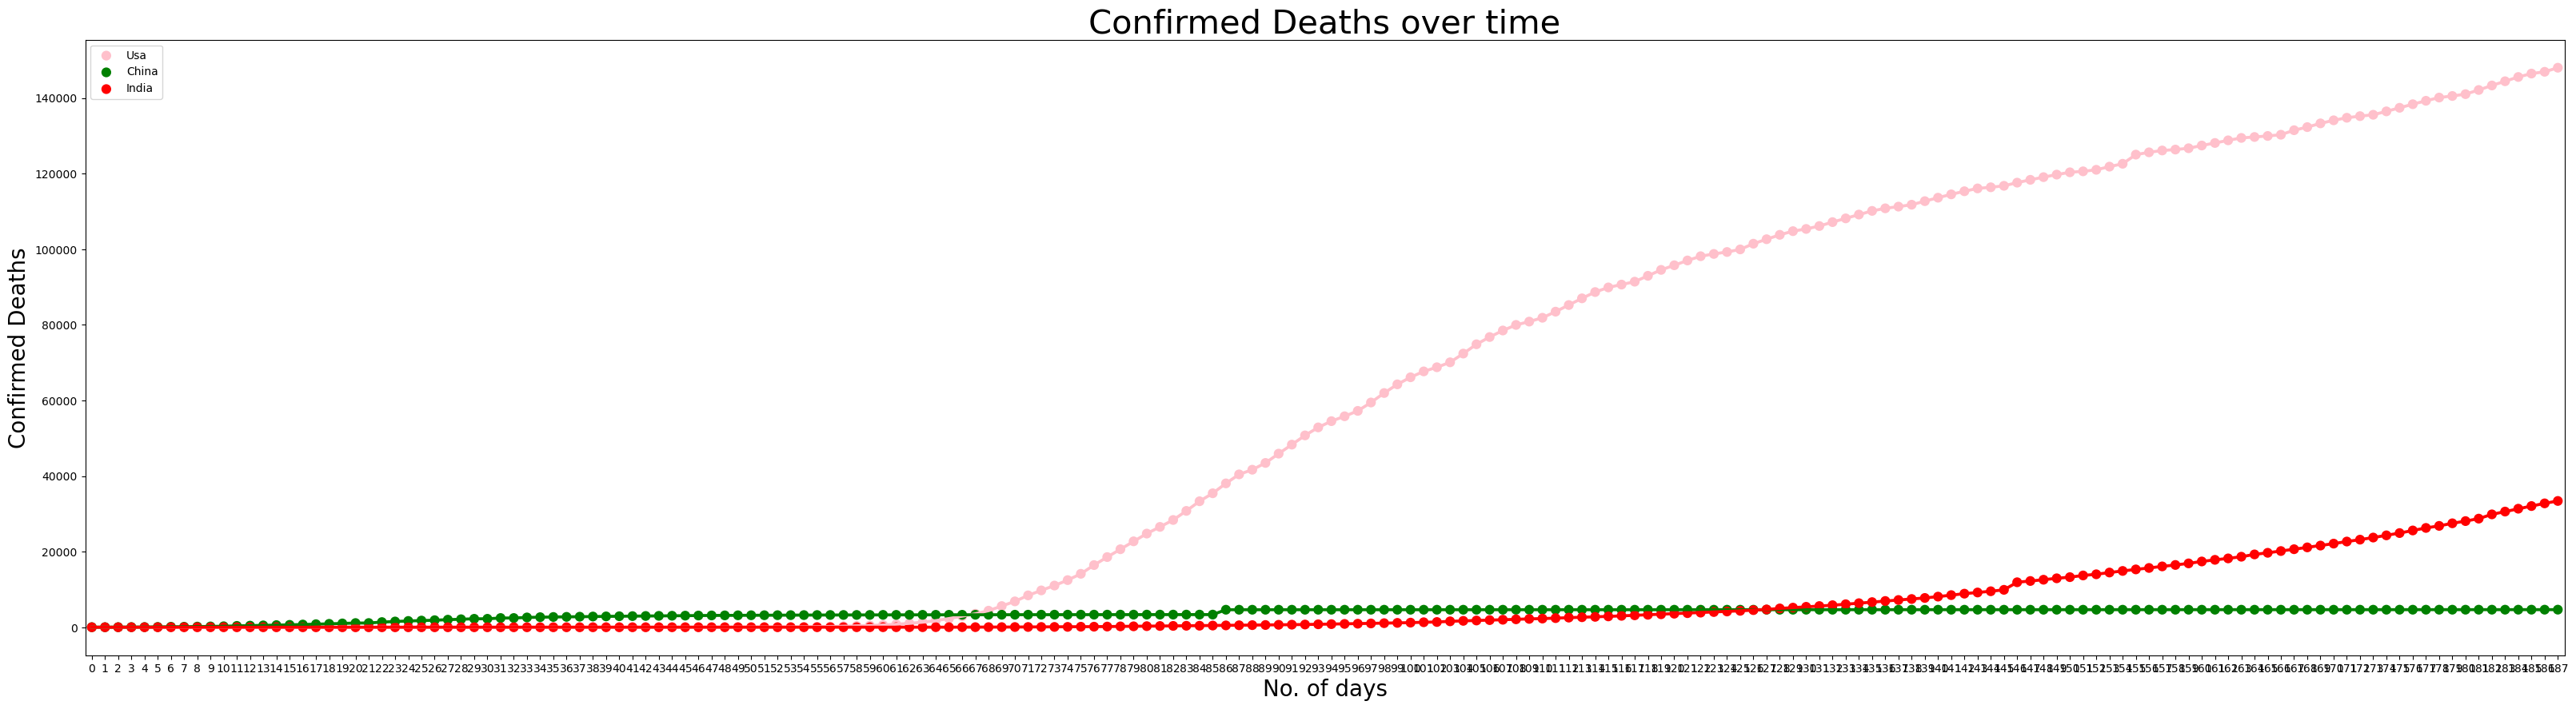

In [39]:
plt.figure(figsize=(40,10))
sns.pointplot(data=Usa, x=Usa.index, y='Deaths', color="Pink", label="Usa")
sns.pointplot(data=China, x=China.index, y='Deaths', color="Green", label="China")
sns.pointplot(data=India, x=India.index, y='Deaths', color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Confirmed Deaths', fontsize=20)
plt.title('Confirmed Deaths over time', fontsize=30)


plt.legend()

plt.show()

# comparison on the basis of recovered

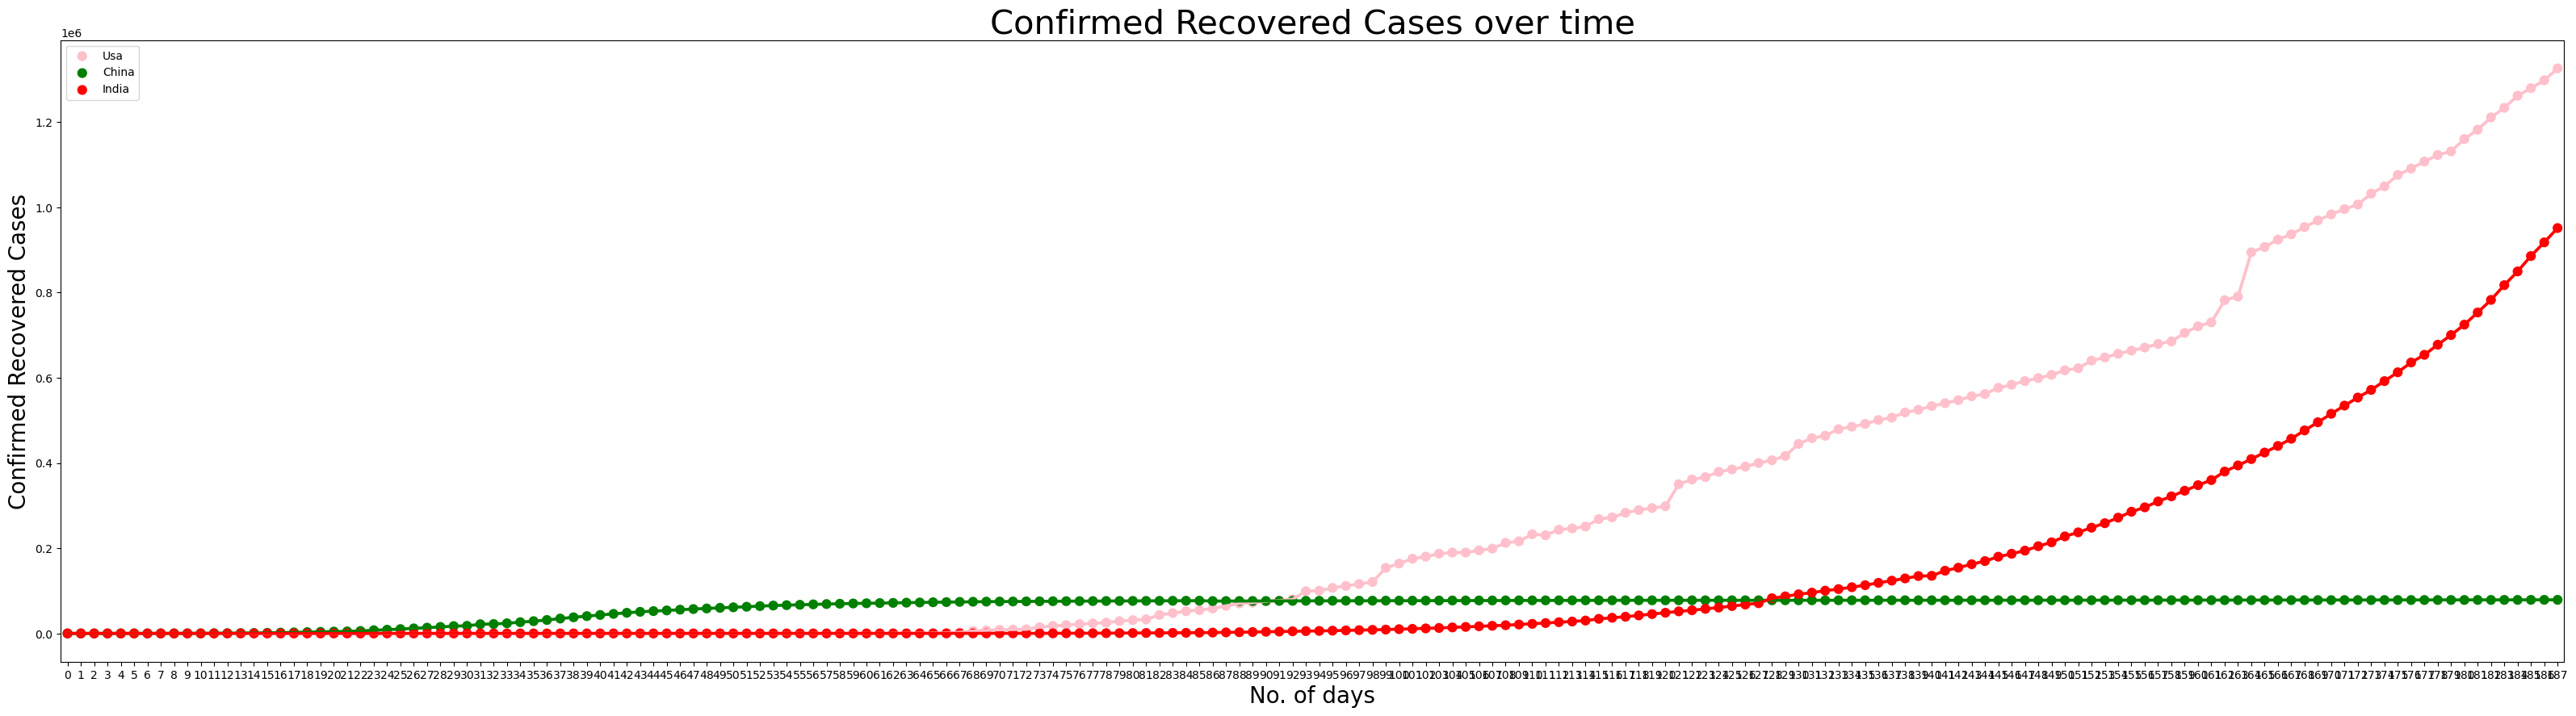

In [40]:
plt.figure(figsize=(40,10))
sns.pointplot(data=Usa, x=Usa.index, y='Recovered', color="Pink", label="Usa")
sns.pointplot(data=China, x=China.index, y='Recovered', color="Green", label="China")
sns.pointplot(data=India, x=India.index, y='Recovered', color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Confirmed Recovered Cases', fontsize=20)
plt.title('Confirmed Recovered Cases over time', fontsize=30)


plt.legend()

plt.show()

# comparison on the basis of confirmed

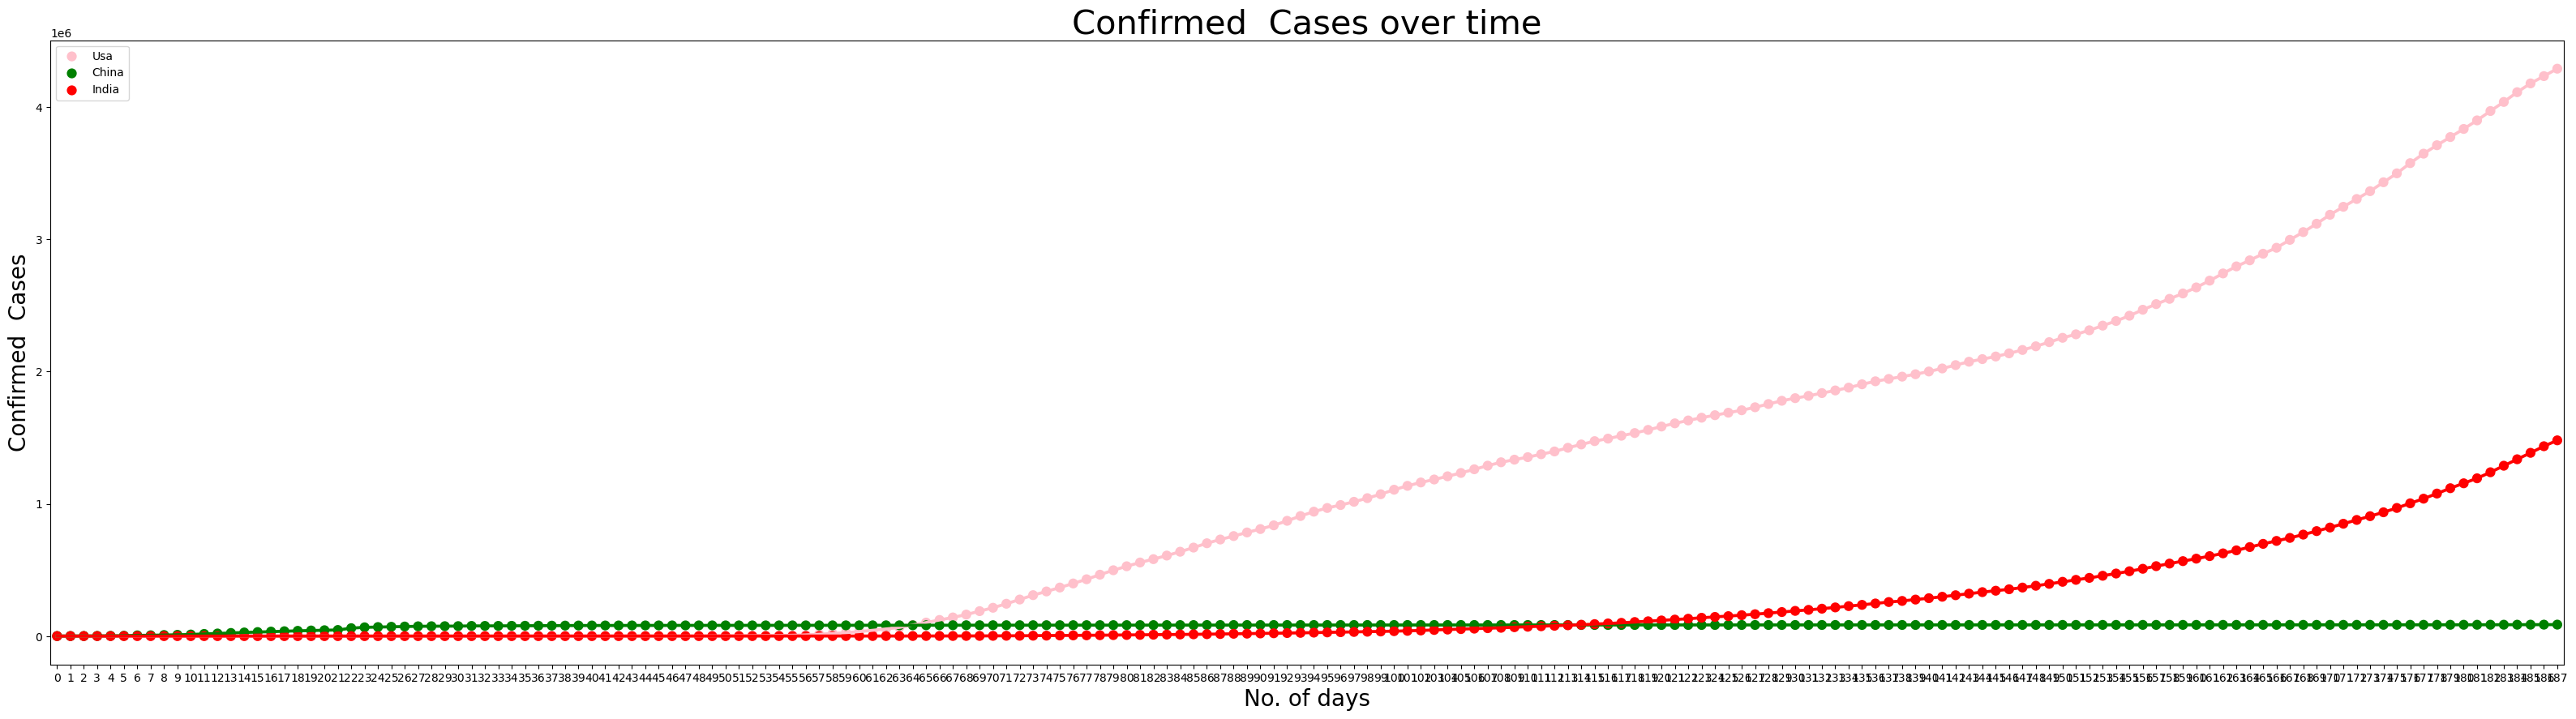

In [41]:
plt.figure(figsize=(40,10))
sns.pointplot(data=Usa, x=Usa.index, y='Confirmed', color="Pink", label="Usa")
sns.pointplot(data=China, x=China.index, y='Confirmed', color="Green", label="China")
sns.pointplot(data=India, x=India.index, y='Confirmed', color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Confirmed  Cases', fontsize=20)
plt.title('Confirmed  Cases over time', fontsize=30)


plt.legend()

plt.show()

In [42]:
df=pd.read_csv('covid_19_clean_complete.csv',parse_dates=["Date"])

In [43]:
df

Province/State         Country/Region        Lat       Long       Date  \
0                NaN            Afghanistan  33.939110  67.709953 2020-01-22   
1                NaN                Albania  41.153300  20.168300 2020-01-22   
2                NaN                Algeria  28.033900   1.659600 2020-01-22   
3                NaN                Andorra  42.506300   1.521800 2020-01-22   
4                NaN                 Angola -11.202700  17.873900 2020-01-22   
...              ...                    ...        ...        ...        ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100 2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388 2020-07-27   
49065            NaN                Comoros -11.645500  43.333300 2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100 2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600 2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [45]:
confirmed=df.groupby(by="Date").sum()["Confirmed"].reset_index()

In [46]:
confirmed

Date  Confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

In [47]:
deaths=df.groupby(by="Date").sum()["Deaths"].reset_index()

In [48]:
deaths

Date  Deaths
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

In [49]:
recovered=df.groupby(by="Date").sum()["Recovered"].reset_index()

In [50]:
recovered

Date  Recovered
0   2020-01-22         28
1   2020-01-23         30
2   2020-01-24         36
3   2020-01-25         39
4   2020-01-26         52
..         ...        ...
183 2020-07-23    8710969
184 2020-07-24    8939705
185 2020-07-25    9158743
186 2020-07-26    9293464
187 2020-07-27    9468087

[188 rows x 2 columns]

In [51]:
active=df.groupby(by="Date").sum()["Active"].reset_index()

In [52]:
active

Date   Active
0   2020-01-22      510
1   2020-01-23      606
2   2020-01-24      879
3   2020-01-25     1353
4   2020-01-26     2010
..         ...      ...
183 2020-07-23  6166006
184 2020-07-24  6212290
185 2020-07-25  6243930
186 2020-07-26  6309711
187 2020-07-27  6358362

[188 rows x 2 columns]

# forcasting for confirmed cases

In [53]:
from prophet import Prophet

In [54]:
m=Prophet()

In [55]:
confirmed.columns = ["ds","y"]

In [56]:
m.fit(confirmed)

11:53:00 - cmdstanpy - INFO - Chain [1] start processing
11:53:00 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
future=m.make_future_dataframe(periods=7)

In [58]:
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [59]:
forcast=m.predict(future)

In [60]:
forcast


ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22 -9.356186e+03 -1.299930e+05  8.927572e+04 -9.356186e+03   
1   2020-01-23 -6.667734e+03 -1.141043e+05  9.762963e+04 -6.667734e+03   
2   2020-01-24 -3.979282e+03 -9.586933e+04  1.103265e+05 -3.979282e+03   
3   2020-01-25 -1.290830e+03 -9.687020e+04  1.132049e+05 -1.290830e+03   
4   2020-01-26  1.397622e+03 -9.358681e+04  1.124460e+05  1.397622e+03   
..         ...           ...           ...           ...           ...   
190 2020-07-30  1.674928e+07  1.664518e+07  1.685310e+07  1.674438e+07   
191 2020-07-31  1.695352e+07  1.685717e+07  1.707242e+07  1.694249e+07   
192 2020-08-01  1.715776e+07  1.706375e+07  1.728643e+07  1.713778e+07   
193 2020-08-02  1.736200e+07  1.726387e+07  1.748624e+07  1.733120e+07   
194 2020-08-03  1.756624e+07  1.745066e+07  1.767484e+07  1.752591e+07   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -9.356186e+03   -10986.210444         -10986.210444         -10986.210444   
1   -6.667734e+03    -1078.891654          -1078.891654          -1078.891654   
2   -3.979282e+03    10103.249373          10103.249373          10103.249373   
3   -1.290830e+03    13670.214198          13670.214198          13670.214198   
4    1.397622e+03     7218.144397           7218.144397           7218.144397   
..            ...             ...                   ...                   ...   
190  1.675608e+07    -1078.891654          -1078.891654          -1078.891654   
191  1.696687e+07    10103.249373          10103.249373          10103.249373   
192  1.717965e+07    13670.214198          13670.214198          13670.214198   
193  1.739514e+07     7218.144397           7218.144397           7218.144397   
194  1.761089e+07    -2144.375427          -2144.375427          -2144.375427   

           weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -10986.210444 -10986.210444 -10986.210444                   0.0   
1    -1078.891654  -1078.891654  -1078.891654                   0.0   
2    10103.249373  10103.249373  10103.249373                   0.0   
3    13670.214198  13670.214198  13670.214198                   0.0   
4     7218.144397   7218.144397   7218.144397                   0.0   
..            ...           ...           ...                   ...   
190  -1078.891654  -1078.891654  -1078.891654                   0.0   
191  10103.249373  10103.249373  10103.249373                   0.0   
192  13670.214198  13670.214198  13670.214198                   0.0   
193   7218.144397   7218.144397   7218.144397                   0.0   
194  -2144.375427  -2144.375427  -2144.375427                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -2.034240e+04  
1                           0.0                         0.0 -7.746625e+03  
2                           0.0                         0.0  6.123967e+03  
3                           0.0                         0.0  1.237938e+04  
4                           0.0                         0.0  8.615766e+03  
..                          ...                         ...           ...  
190                         0.0                         0.0  1.674820e+07  
191                         0.0                         0.0  1.696362e+07  
192                         0.0                         0.0  1.717143e+07  
193                         0.0                         0.0  1.736922e+07  
194                         0.0                         0.0  1.756410e+07  

[195 rows x 16 columns]

In [61]:
forcast[["ds","yhat","yhat_lower","yhat_upper"]]

ds          yhat    yhat_lower    yhat_upper
0   2020-01-22 -2.034240e+04 -1.299930e+05  8.927572e+04
1   2020-01-23 -7.746625e+03 -1.141043e+05  9.762963e+04
2   2020-01-24  6.123967e+03 -9.586933e+04  1.103265e+05
3   2020-01-25  1.237938e+04 -9.687020e+04  1.132049e+05
4   2020-01-26  8.615766e+03 -9.358681e+04  1.124460e+05
..         ...           ...           ...           ...
190 2020-07-30  1.674820e+07  1.664518e+07  1.685310e+07
191 2020-07-31  1.696362e+07  1.685717e+07  1.707242e+07
192 2020-08-01  1.717143e+07  1.706375e+07  1.728643e+07
193 2020-08-02  1.736922e+07  1.726387e+07  1.748624e+07
194 2020-08-03  1.756410e+07  1.745066e+07  1.767484e+07

[195 rows x 4 columns]

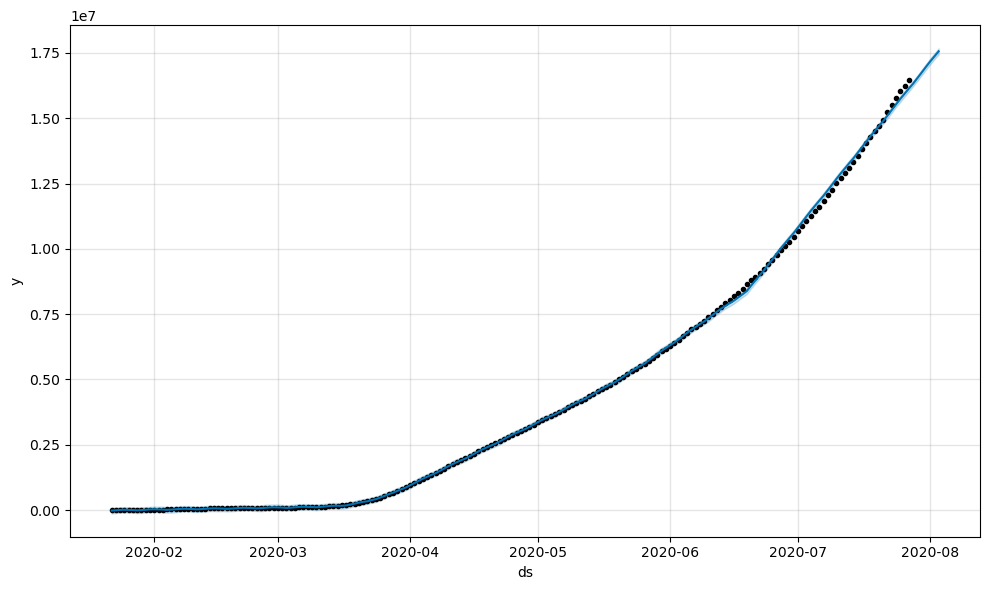

In [62]:
m.plot(forcast)
plt.show()

In [63]:
import plotly

In [64]:
import plotly.express as px

# forcasting for recovered cases

In [65]:
recovered.columns=["ds","y"]

In [66]:
m=Prophet()

In [67]:
m.fit(recovered)

11:53:00 - cmdstanpy - INFO - Chain [1] start processing
11:53:00 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
future=m.make_future_dataframe(periods=7)

In [69]:
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [70]:
forcast=m.predict(future)

In [71]:
forcast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22 -1.205742e+04 -9.416770e+04  6.414578e+04 -1.205742e+04   
1   2020-01-23 -1.098608e+04 -8.859972e+04  7.195395e+04 -1.098608e+04   
2   2020-01-24 -9.914746e+03 -8.607128e+04  7.179574e+04 -9.914746e+03   
3   2020-01-25 -8.843409e+03 -7.615126e+04  7.845612e+04 -8.843409e+03   
4   2020-01-26 -7.772072e+03 -9.435926e+04  6.761561e+04 -7.772072e+03   
..         ...           ...           ...           ...           ...   
190 2020-07-30  9.597263e+06  9.520829e+06  9.672984e+06  9.593489e+06   
191 2020-07-31  9.733968e+06  9.666329e+06  9.817586e+06  9.725740e+06   
192 2020-08-01  9.870673e+06  9.794094e+06  9.960355e+06  9.857253e+06   
193 2020-08-02  1.000738e+07  9.926077e+06  1.009073e+07  9.988142e+06   
194 2020-08-03  1.014408e+07  1.005589e+07  1.023420e+07  1.011852e+07   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -1.205742e+04    -4840.302869          -4840.302869          -4840.302869   
1   -1.098608e+04     1268.505419           1268.505419           1268.505419   
2   -9.914746e+03     6127.046185           6127.046185           6127.046185   
3   -8.843409e+03     9721.186032           9721.186032           9721.186032   
4   -7.772072e+03     -915.440191           -915.440191           -915.440191   
..            ...             ...                   ...                   ...   
190  9.600939e+06     1268.505419           1268.505419           1268.505419   
191  9.742259e+06     6127.046185           6127.046185           6127.046185   
192  9.885536e+06     9721.186032           9721.186032           9721.186032   
193  1.003025e+07     -915.440191           -915.440191           -915.440191   
194  1.017521e+07    -1036.123578          -1036.123578          -1036.123578   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -4840.302869  -4840.302869  -4840.302869                   0.0   
1    1268.505419   1268.505419   1268.505419                   0.0   
2    6127.046185   6127.046185   6127.046185                   0.0   
3    9721.186032   9721.186032   9721.186032                   0.0   
4    -915.440191   -915.440191   -915.440191                   0.0   
..           ...           ...           ...                   ...   
190  1268.505419   1268.505419   1268.505419                   0.0   
191  6127.046185   6127.046185   6127.046185                   0.0   
192  9721.186032   9721.186032   9721.186032                   0.0   
193  -915.440191   -915.440191   -915.440191                   0.0   
194 -1036.123578  -1036.123578  -1036.123578                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -1.689772e+04  
1                           0.0                         0.0 -9.717577e+03  
2                           0.0                         0.0 -3.787700e+03  
3                           0.0                         0.0  8.777771e+02  
4                           0.0                         0.0 -8.687512e+03  
..                          ...                         ...           ...  
190                         0.0                         0.0  9.598531e+06  
191                         0.0                         0.0  9.740095e+06  
192                         0.0                         0.0  9.880394e+06  
193                         0.0                         0.0  1.000646e+07  
194                         0.0                         0.0  1.014305e+07  

[195 rows x 16 columns]

In [72]:
forcast[["ds","yhat","yhat_lower","yhat_upper"]]

ds          yhat    yhat_lower    yhat_upper
0   2020-01-22 -1.689772e+04 -9.416770e+04  6.414578e+04
1   2020-01-23 -9.717577e+03 -8.859972e+04  7.195395e+04
2   2020-01-24 -3.787700e+03 -8.607128e+04  7.179574e+04
3   2020-01-25  8.777771e+02 -7.615126e+04  7.845612e+04
4   2020-01-26 -8.687512e+03 -9.435926e+04  6.761561e+04
..         ...           ...           ...           ...
190 2020-07-30  9.598531e+06  9.520829e+06  9.672984e+06
191 2020-07-31  9.740095e+06  9.666329e+06  9.817586e+06
192 2020-08-01  9.880394e+06  9.794094e+06  9.960355e+06
193 2020-08-02  1.000646e+07  9.926077e+06  1.009073e+07
194 2020-08-03  1.014305e+07  1.005589e+07  1.023420e+07

[195 rows x 4 columns]

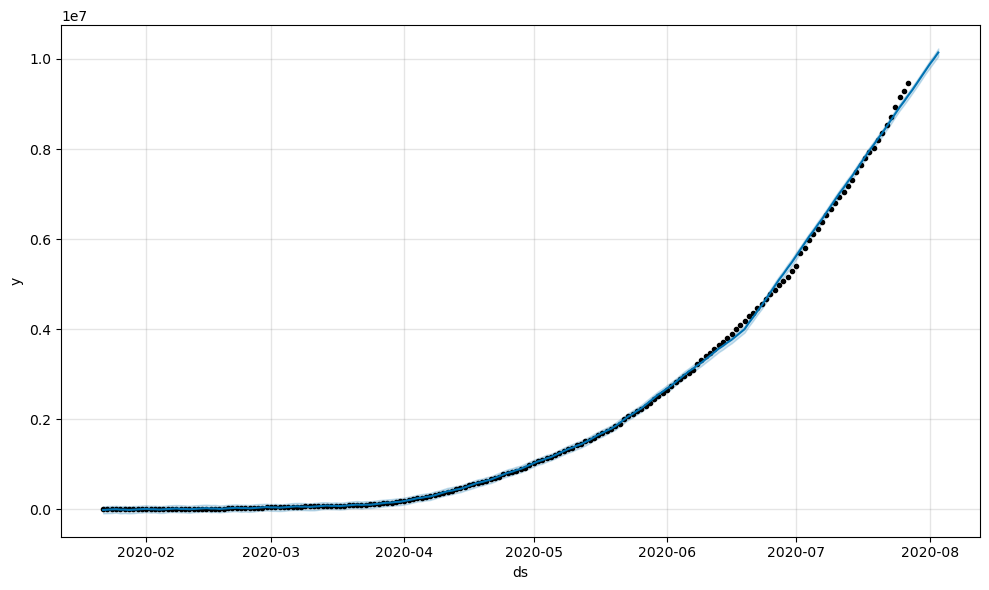

In [73]:
m.plot(forcast)
plt.show()

# forcasting on the basis of active cases

In [74]:
m=Prophet()

In [75]:
active.columns=["ds","y"]

In [76]:
m.fit(active)

11:53:01 - cmdstanpy - INFO - Chain [1] start processing
11:53:01 - cmdstanpy - INFO - Chain [1] done processing


In [77]:
future=m.make_future_dataframe(periods=7)

In [78]:
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [79]:
forcast=m.predict(future)

In [80]:
forcast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22  3.938643e+02 -5.031819e+04  3.981989e+04  3.938643e+02   
1   2020-01-23  2.179133e+03 -4.504802e+04  4.576677e+04  2.179133e+03   
2   2020-01-24  3.964401e+03 -3.653955e+04  5.116190e+04  3.964401e+03   
3   2020-01-25  5.749669e+03 -3.601389e+04  5.426868e+04  5.749669e+03   
4   2020-01-26  7.534937e+03 -2.584697e+04  6.264289e+04  7.534937e+03   
..         ...           ...           ...           ...           ...   
190 2020-07-30  6.483573e+06  6.432897e+06  6.528724e+06  6.481012e+06   
191 2020-07-31  6.545825e+06  6.497451e+06  6.598772e+06  6.540260e+06   
192 2020-08-01  6.608078e+06  6.566467e+06  6.664018e+06  6.598703e+06   
193 2020-08-02  6.670331e+06  6.628994e+06  6.726394e+06  6.656203e+06   
194 2020-08-03  6.732584e+06  6.681504e+06  6.785333e+06  6.713901e+06   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    3.938643e+02    -5768.245001          -5768.245001          -5768.245001   
1    2.179133e+03    -2565.777101          -2565.777101          -2565.777101   
2    3.964401e+03     3219.382782           3219.382782           3219.382782   
3    5.749669e+03     3129.564761           3129.564761           3129.564761   
4    7.534937e+03     8182.557400           8182.557400           8182.557400   
..            ...             ...                   ...                   ...   
190  6.486692e+06    -2565.777101          -2565.777101          -2565.777101   
191  6.552183e+06     3219.382782           3219.382782           3219.382782   
192  6.618773e+06     3129.564761           3129.564761           3129.564761   
193  6.686543e+06     8182.557400           8182.557400           8182.557400   
194  6.755400e+06     -334.830669           -334.830669           -334.830669   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -5768.245001  -5768.245001  -5768.245001                   0.0   
1   -2565.777101  -2565.777101  -2565.777101                   0.0   
2    3219.382782   3219.382782   3219.382782                   0.0   
3    3129.564761   3129.564761   3129.564761                   0.0   
4    8182.557400   8182.557400   8182.557400                   0.0   
..           ...           ...           ...                   ...   
190 -2565.777101  -2565.777101  -2565.777101                   0.0   
191  3219.382782   3219.382782   3219.382782                   0.0   
192  3129.564761   3129.564761   3129.564761                   0.0   
193  8182.557400   8182.557400   8182.557400                   0.0   
194  -334.830669   -334.830669   -334.830669                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -5.374381e+03  
1                           0.0                         0.0 -3.866446e+02  
2                           0.0                         0.0  7.183784e+03  
3                           0.0                         0.0  8.879234e+03  
4                           0.0                         0.0  1.571749e+04  
..                          ...                         ...           ...  
190                         0.0                         0.0  6.481007e+06  
191                         0.0                         0.0  6.549045e+06  
192                         0.0                         0.0  6.611208e+06  
193                         0.0                         0.0  6.678514e+06  
194                         0.0                         0.0  6.732249e+06  

[195 rows x 16 columns]

In [81]:
forcast[["ds","yhat","yhat_lower","yhat_upper"]]

ds          yhat    yhat_lower    yhat_upper
0   2020-01-22 -5.374381e+03 -5.031819e+04  3.981989e+04
1   2020-01-23 -3.866446e+02 -4.504802e+04  4.576677e+04
2   2020-01-24  7.183784e+03 -3.653955e+04  5.116190e+04
3   2020-01-25  8.879234e+03 -3.601389e+04  5.426868e+04
4   2020-01-26  1.571749e+04 -2.584697e+04  6.264289e+04
..         ...           ...           ...           ...
190 2020-07-30  6.481007e+06  6.432897e+06  6.528724e+06
191 2020-07-31  6.549045e+06  6.497451e+06  6.598772e+06
192 2020-08-01  6.611208e+06  6.566467e+06  6.664018e+06
193 2020-08-02  6.678514e+06  6.628994e+06  6.726394e+06
194 2020-08-03  6.732249e+06  6.681504e+06  6.785333e+06

[195 rows x 4 columns]

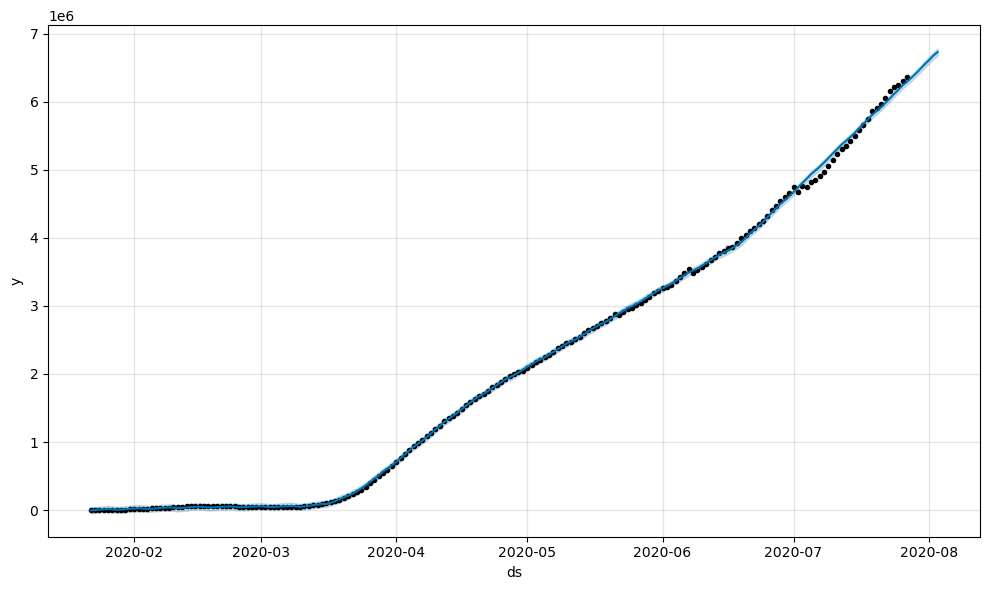

In [82]:
m.plot(forcast)
plt.show()

# forcasting on the basis of deaths

In [83]:
deaths.columns = ["ds","y"]
m=Prophet()

In [84]:
m.fit(deaths)

11:53:01 - cmdstanpy - INFO - Chain [1] start processing
11:53:01 - cmdstanpy - INFO - Chain [1] done processing


In [85]:
future=m.make_future_dataframe(periods=7)

In [86]:
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [87]:
forcast=m.predict(future)

In [88]:
forcast

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0   2020-01-22    -521.770954   -2584.453827    1141.159654    -521.770954   
1   2020-01-23    -432.731822   -1838.166702    1905.532241    -432.731822   
2   2020-01-24    -343.692690   -1402.268144    2544.710039    -343.692690   
3   2020-01-25    -254.653558   -1357.267978    2490.582186    -254.653558   
4   2020-01-26    -165.614426   -2292.991143    1626.637662    -165.614426   
..         ...            ...            ...            ...            ...   
190 2020-07-30  663133.156415  661450.850498  665540.849520  662901.679370   
191 2020-07-31  668164.161337  666736.726435  671321.957611  667593.967445   
192 2020-08-01  673195.166259  671503.975102  676204.367155  672178.600558   
193 2020-08-02  678226.171181  675526.908874  680842.419299  676761.667609   
194 2020-08-03  683257.176103  679365.061797  685239.502281  681362.829848   

       trend_upper  additive_terms  additive_terms_lower  \
0      -521.770954     -191.374799           -191.374799   
1      -432.731822      388.586941            388.586941   
2      -343.692690      874.801623            874.801623   
3      -254.653558      727.298797            727.298797   
4      -165.614426     -165.701725           -165.701725   
..             ...             ...                   ...   
190  663458.353239      388.586941            388.586941   
191  668762.494300      874.801623            874.801623   
192  674288.452344      727.298797            727.298797   
193  679730.130462     -165.701725           -165.701725   
194  685414.071610     -905.321485           -905.321485   

     additive_terms_upper      weekly  weekly_lower  weekly_upper  \
0             -191.374799 -191.374799   -191.374799   -191.374799   
1              388.586941  388.586941    388.586941    388.586941   
2              874.801623  874.801623    874.801623    874.801623   
3              727.298797  727.298797    727.298797    727.298797   
4             -165.701725 -165.701725   -165.701725   -165.701725   
..                    ...         ...           ...           ...   
190            388.586941  388.586941    388.586941    388.586941   
191            874.801623  874.801623    874.801623    874.801623   
192            727.298797  727.298797    727.298797    727.298797   
193           -165.701725 -165.701725   -165.701725   -165.701725   
194           -905.321485 -905.321485   -905.321485   -905.321485   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
190                   0.0                         0.0   
191                   0.0                         0.0   
192                   0.0                         0.0   
193                   0.0                         0.0   
194                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
0                           0.0    -713.145753  
1                           0.0     -44.144881  
2                           0.0     531.108934  
3                           0.0     472.645240  
4                           0.0    -331.316151  
..                          ...            ...  
190                         0.0  663521.743356  
191                         0.0  669038.962960  
192                         0.0  673922.465056  
193                         0.0  678060.469456  
194                         0.0  682351.854619  

[195 rows x 16 columns]

In [89]:
forcast[["ds","yhat","yhat_lower","yhat_upper"]]

ds           yhat     yhat_lower     yhat_upper
0   2020-01-22    -713.145753   -2584.453827    1141.159654
1   2020-01-23     -44.144881   -1838.166702    1905.532241
2   2020-01-24     531.108934   -1402.268144    2544.710039
3   2020-01-25     472.645240   -1357.267978    2490.582186
4   2020-01-26    -331.316151   -2292.991143    1626.637662
..         ...            ...            ...            ...
190 2020-07-30  663521.743356  661450.850498  665540.849520
191 2020-07-31  669038.962960  666736.726435  671321.957611
192 2020-08-01  673922.465056  671503.975102  676204.367155
193 2020-08-02  678060.469456  675526.908874  680842.419299
194 2020-08-03  682351.854619  679365.061797  685239.502281

[195 rows x 4 columns]

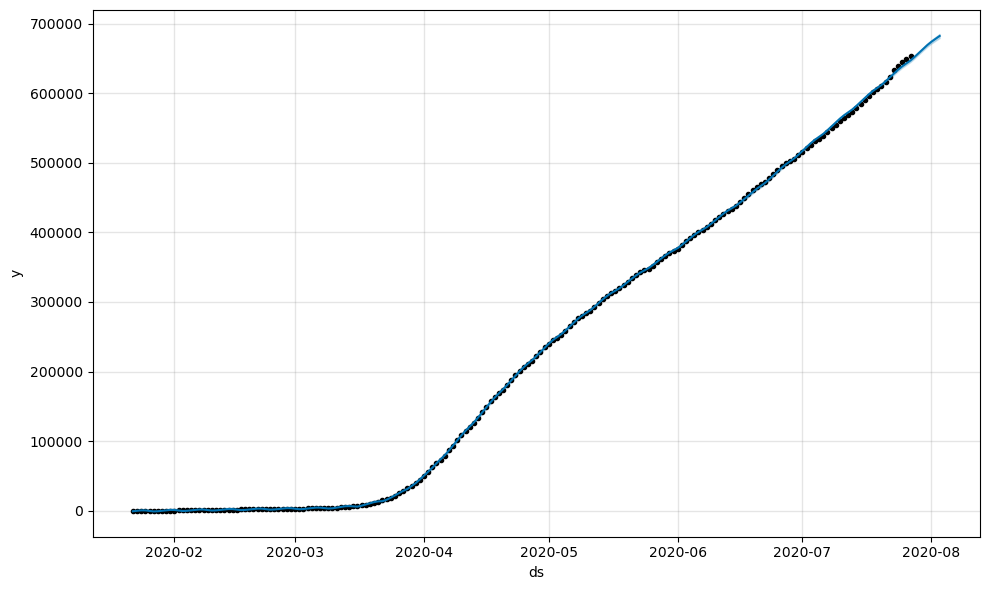

In [90]:
m.plot(forcast)
plt.show()